# Lab Segmentation 2

In [2]:
from commonfunctions import *
from skimage.exposure import histogram
%matplotlib inline
%load_ext autoreload
%autoreload 2

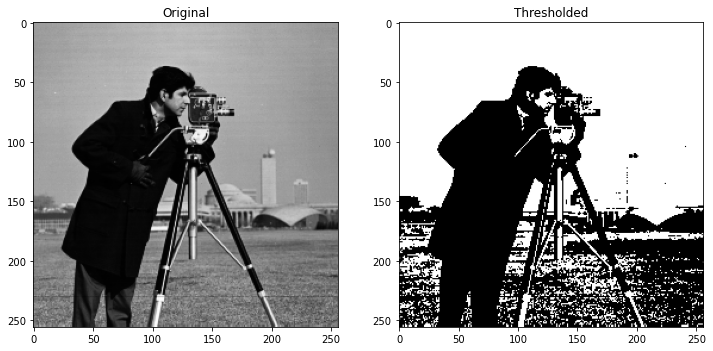

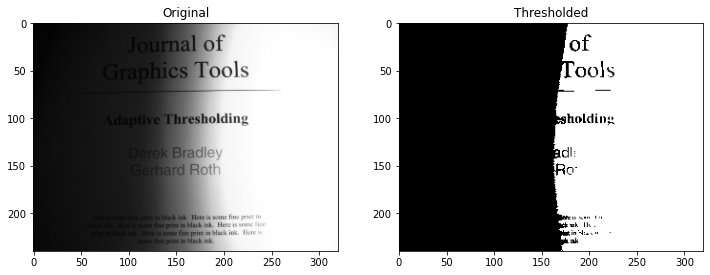

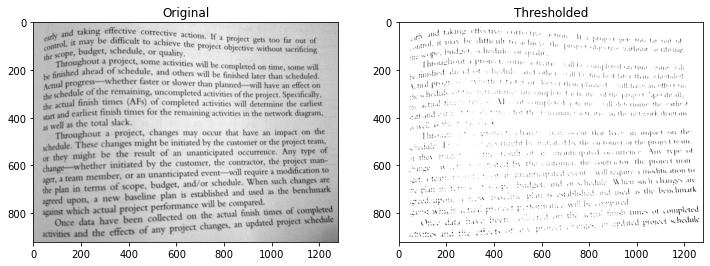

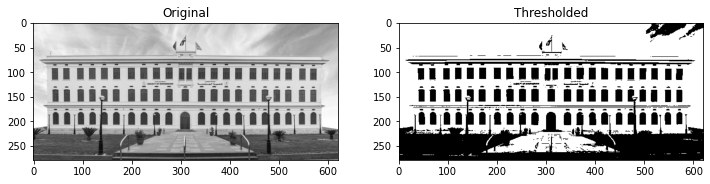

In [8]:
def getThreshold(img):
    img = (img*255).astype('uint8')
    hist, _= histogram(img, nbins=255)
    totalNofPixels = sum(hist)
    pixelsSum = sum(starmap(mul, enumerate(hist)))
    tInit = round(pixelsSum/totalNofPixels)
    tPrev = 0
    tCurrent = tInit
    while (tPrev==tCurrent):
        tPrev = tCurrent
        low = hist[range(0,tPrev+1)]
        high = hist[range(tPrev,hist.shape[0]-1)]
        lowAvg = sum(starmap(mul, enumerate(low))) / sum(low)
        highAvg = sum(starmap(mul, enumerate(high))) / sum(high)
        tCurrent = round((lowAvg + highAvg)/2)
    return tCurrent

images = ["cameraman.png", "book.png", "book1.png", "cufe.png"]
for img in images:
    image = []
    imageToThresh = []
    if img == "cameraman.png" or img == "book.png":
        image = (io.imread(img)).astype('uint8')
        imageToThresh = image
    else:
        image = rgb2gray(io.imread(img)[:,:,:3])
        imageToThresh = (image*255).astype('uint8')
        
    threhold = getThreshold(image)
    thresholded = (imageToThresh > threhold)
    show_images([image, thresholded], ["Original", "Thresholded"])

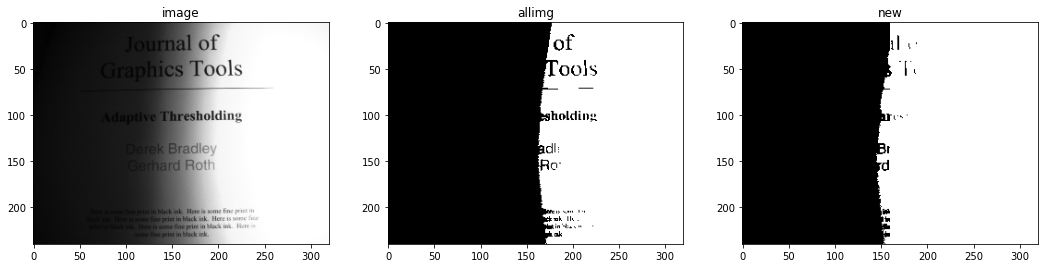

In [11]:

def getquarter(img):
    t = getThreshold(img)
    img = img > t 
    return img

def apply_local_thresholds(img):
    width, height = img.shape
    
    q1 = getquarter(img[0:width // 2, 0:height // 2])
    q2 = getquarter(img[0:width // 2, height // 2 :])
    q3 = getquarter(img[width // 2 :, 0 : height // 2])
    q4 = getquarter(img[width // 2 :, height // 2 :])
    
    new_img = np.zeros_like(img)
    
    new_img[0:width // 2, 0:height // 2] = q1
    new_img[0:width // 2, height // 2 :] = q2
    new_img[width // 2 :, 0:height // 2] = q3
    new_img[width // 2 :, height // 2 :] = q4

    return new_img

image = (io.imread("book.png", as_gray=True))

# image = rgb2gray(io.imread("book.png")[:,:,:3])
# imageToThresh = (image*255).astype('uint8')

new=apply_local_thresholds(image)

allimg = image > getThreshold(image)

show_images([image , allimg , new],["image" , "allimg" , "new"])

In [14]:
def enhanced(image):
    x, y = image.shape
    
    if x < 9 or y < 9 :
        return getquarter(image)               
    else: 
        q1 = enhanced(image[0:x // 2, 0:y // 2])
        q2 = enhanced(image[0:x // 2, y // 2 :])
        q3 = enhanced(image[x // 2 :, 0 : y // 2])
        q4 = enhanced(image[x // 2 :, y // 2 :])

        new_img = np.zeros_like(image)
    
        new_img[0:x // 2, 0:y // 2] = q1
        new_img[0:x // 2, y // 2 :] = q2
        new_img[x // 2 :, 0:y // 2] = q3
        new_img[x // 2 :, y // 2 :] = q4

        return new_img


image = (io.imread("book.png", as_gray=True))

# image = rgb2gray(io.imread("book.png")[:,:,:3])
# imageToThresh = (image*255).astype('uint8')

new=enhanced(image)

allimg = image > getThreshold(image)

show_images([image , allimg , new],["image" , "allimg" , "new"])

KeyboardInterrupt: 